In [2]:
#importing libraries
import pandas as pd

In [3]:
#Reading the dataset
data=pd.read_csv('employee.csv')
data.shape

(1470, 35)

In [4]:
# lets check the head of the dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The general syntax is ```pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', ...)```.
* ```data``` is a dataframe
* ```values``` contains the column to aggregate
* ```index``` is the row in the pivot table
* ```columns``` contains the columns you want in the pivot table
* ```aggfunc``` is the aggregate function

Let's see some examples.

In [5]:
# let's make a pivot table for the department and their mean ages

data.pivot_table(values ='MonthlyIncome', index = 'Department', aggfunc = 'mean')

,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


In [6]:
#خودم
data[['MonthlyIncome','Department']].groupby(data['Department']).agg('mean')

,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


In [8]:
# let's make a pivot table for the department and their mean ages

data.pivot_table(values ='MonthlyIncome', index = 'Department', aggfunc = 'mean').style.background_gradient(cmap ='copper')

,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


<AxesSubplot:xlabel='Department'>

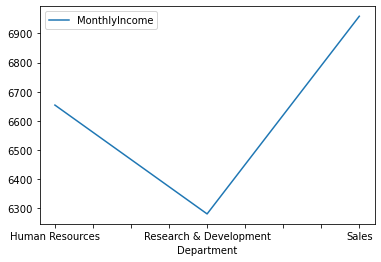

In [7]:
# let's make a pivot table for the department and their mean ages

data.pivot_table(values ='MonthlyIncome', index = 'Department', aggfunc = 'mean').plot(kind = 'line')

In [12]:
#خودم
#Difference between 'pivot_table' and 'groupby()':
#Both pivot_table and groupby are used to aggregate your dataframe. 
#The difference is only with regard to the shape of the result.
#Using pd.pivot_table(df, index=["a"], columns=["b"], values=["c"], aggfunc=np.sum) a table is created where a is on the row axis, b is on the column axis, and the values are the sum of c.

import numpy as np
df = pd.DataFrame({"a": [1,2,3,1,2,3], "b":[1,1,1,2,2,2], "c":np.random.rand(6)})
pd.pivot_table(df, index=["a"], columns=["b"], values=["c"], aggfunc=np.sum)





c          
b         1         2
a                    
1  0.903494  0.905105
2  0.552504  0.030905
3  0.802472  0.009091

In [13]:
#Using groupby, the dimensions given are placed into columns, and rows are created for each combination of those dimensions.
#In this example, we create a series of the sum of values c, grouped by all unique combinations of a and b.

df.groupby(['a','b'])['c'].sum()

a  b
1  1    0.903494
   2    0.905105
2  1    0.552504
   2    0.030905
3  1    0.802472
   2    0.009091
Name: c, dtype: float64